In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import regex as re
import emoji
import plotly.express as px
from collections import Counter
from os import path
from PIL import Image
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator

In [3]:
def dateandtime(s):
    pattern = r"^[\d]{1,2}/[\d]{1,2}/[\d]{4}"
    result=re.match(pattern,s)
    if result:
        return True
    else:
        return False

In [4]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [28]:
def getDataPoint(line):  
    splitLine = line.split('-') 
    dateTime = splitLine[0]
    date, time = dateTime.split() 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [30]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = "WhatsApp Chat with Yuva Samaj Seva🇳🇪🇳🇪.txt" # path for the whatsapp text file
with open(conversation, encoding="utf-8") as fp:

    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    print("fp.readline() : \n", fp.readline())
    messageBuffer = [] 
    print("messageBuffer : \n", messageBuffer)
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip() 
        print("line: \n", line)
        if dateandtime(line):
            print("startsWithDateAndTime : \n", dateandtime)
        if len(messageBuffer) > 0:
            parsedData.append([date, time, author, ' '.join(messageBuffer)])
        messageBuffer.clear()  
        messageBuffer.append(message)

    else:
        messageBuffer.append(line)


fp.readline() : 
 25/09/22, 8:26 am - Www created group "Yuva Samaj Seva🇳🇪🇳🇪"

messageBuffer : 
 []
line: 
 26/09/22, 3:36 pm - Www added you
line: 
 26/09/22, 3:37 pm - Www: <Media omitted>
line: 
 26/09/22, 3:44 pm - Zeeshan: This message was deleted
line: 
 26/09/22, 3:45 pm - Zeeshan: This message was deleted
line: 
 26/09/22, 3:46 pm - Www added +91 91026 26957
line: 
 26/09/22, 4:29 pm - Www added Kashif Master Emadpur
line: 
 26/09/22, 4:59 pm - +91 90316 96142: Jiii
line: 
 26/09/22, 7:51 pm - Www added +91 6200 792 261
line: 
 26/09/22, 7:59 pm - Www added +91 98014 44523
line: 
 27/09/22, 7:24 am - +91 99550 42125: <Media omitted>
line: 
 28/09/22, 12:27 pm - Shanawaz Chahma: <Media omitted>
line: 
 28/09/22, 12:42 pm - Ammar Imam added +91 6290 713 416
line: 
 28/09/22, 12:44 pm - Ammar Imam added +91 6200 980 829, +91 6204 354 706, +91 70043 70819, +91 70443 79116, +91 72948 86487, +91 76771 55156, +91 79911 67191, +91 82941 91157, +91 84092 41548, +91 95469 19896 and +91 9

In [39]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.head(20)

,Date,Time,Author,Message
0,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
1,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
2,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
3,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
4,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
5,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
6,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
7,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
8,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...
9,NaT,None,None,पटना हाईकोर्ट ने बिहार में नगर निकाय चुनाव पर ...


In [38]:
df.Author.unique()

array([None], dtype=object)

In [46]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)
def split_count(text):
    data = re.findall(r'\S+|\n', text)
    emoji_list = []
    for word in data:
        if any(char in emoji.distinct_emoji_list(word) for char in word):
            emoji_list.append(word)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
# print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
# print("Data science Community")
# print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

0
Media: 0
Emojis: 0
Links: 0


In [47]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['a','b','c'] # list of the authors name in the group

for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
    # req_df will contain messages of only one particular user
    print('\n')
    print(f'Stats of {l[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    #links consist of total links
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)
    # print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      0 non-null      datetime64[ns]
 1   Time      0 non-null      object        
 2   Author    0 non-null      object        
 3   Message   817 non-null    object        
 4   emoji     817 non-null    object        
 5   urlcount  817 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 38.4+ KB


Stats of a -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


Stats of b -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


Stats of c -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


C:\Users\amanr\AppData\Local\Temp\ipykernel_3688\2631680599.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [48]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
    print(i)

There are 258988 words in all the messages.


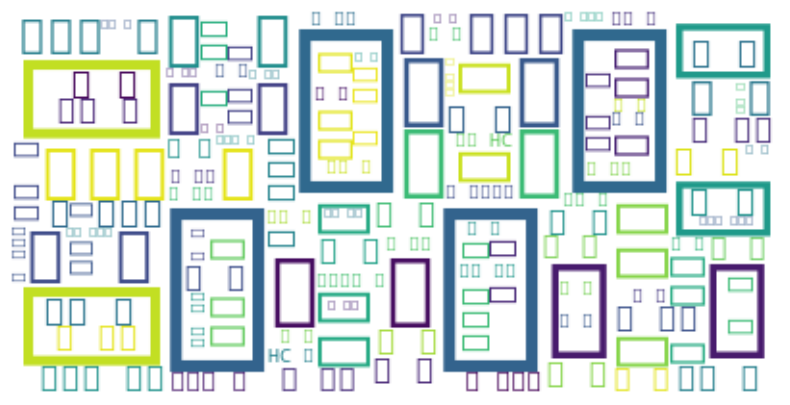

In [49]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
l = ['a','b','c']
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #Display the generated image   
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Author name a


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [51]:
# Check if the text variable is empty
if not text:
    # Print a message and skip the word cloud generation
    print("No text to plot a word cloud")
else:
    # Generate a word cloud image from the text
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    # Display the generated image
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


No text to plot a word cloud
